In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import datetime

In [2]:
price = pd.read_csv('../data/median_comp_price.csv')
price.drop('date.1', axis = 1, inplace=True)
price['date'] = pd.to_datetime(price['date'])
price = price[1:]
price.head()

,date,Portland_median_price,SF_median_price
1,2015-05-10,65.0,120.0
2,2015-05-17,65.0,124.5
3,2015-05-24,65.0,125.0
4,2015-05-31,65.0,120.0
5,2015-06-07,67.0,125.0


In [3]:
# Inferences from CausalImpact

ci_nov2017 = pd.read_csv('../data/causalimpact_infer_nov52017_median.csv')
ci_nov2017 = ci_nov2017.rename(columns={"Unnamed: 0": "date"})
ci_nov2017['date'] = pd.to_datetime(ci_nov2017['date'])
ci_nov2017 = ci_nov2017[1:]

# predicted values from forecasting

forecast_nov2017 = pd.read_csv("../data/forecast_sf_median_132.csv")
forecast_nov2017['ds'] = pd.to_datetime(forecast_nov2017['ds'])
forecast_nov2017 = forecast_nov2017[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

forecast_nov2017_portland = pd.read_csv("../data/forecast_portland_median_132.csv")
forecast_nov2017_portland['ds'] = pd.to_datetime(forecast_nov2017_portland['ds'])
forecast_nov2017_portland = forecast_nov2017_portland[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]



/Users/karensheng/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


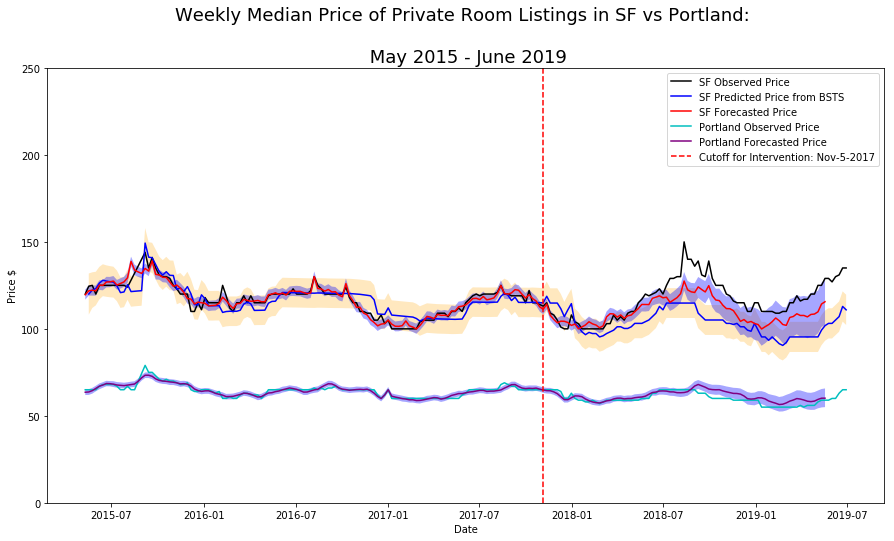

In [4]:
fig, ax = plt.subplots(1,figsize = (15,8))

xlinspace = pd.date_range('2015-05-01', periods= price.shape[0], freq='W')

sns.lineplot(x= 'date', y='SF_median_price', color='k', data = price, label = "SF Observed Price")

sns.lineplot(x= 'date', y='preds', data = ci_nov2017, color = 'b', \
             linestyle = '--', label = "SF Predicted Price from BSTS")

plt.fill_between(ci_nov2017['date'],ci_nov2017['preds_lower'], ci_nov2017['preds_upper'], 
                facecolor = 'orange',
                interpolate = 'True',
                alpha = 0.25)

sns.lineplot(x = 'ds', y = 'yhat', data = forecast_nov2017, linestyle = '--', color = 'red', \
             label = 'SF Forecasted Price')
plt.fill_between(forecast_nov2017['ds'],forecast_nov2017['yhat_lower'],
                 forecast_nov2017['yhat_upper'], 
                facecolor = 'blue',
                interpolate = 'True',
                alpha = 0.35)



sns.lineplot(x= 'date', y='Portland_median_price', data = price, color='c',label = "Portland Observed Price")
sns.lineplot(x = 'ds', y='yhat', data = forecast_nov2017_portland, linestyle = '--',
             color = 'purple', \
             label = 'Portland Forecasted Price')
plt.fill_between(forecast_nov2017_portland['ds'],forecast_nov2017_portland['yhat_lower'],
                 forecast_nov2017_portland['yhat_upper'], 
                facecolor = 'blue',
                interpolate = 'True',
                alpha = 0.35)

    
plt.axvline(x= datetime.date(2017,11,5), color = 'red', linestyle='--',label='Cutoff for Intervention: Nov-5-2017')


ax.set_ylim(0,250)
plt.xlabel("Date")
plt.ylabel("Price $")
plt.title("Weekly Median Price of Private Room Listings in SF vs Portland: \n \n May 2015 - June 2019", fontsize = 18)
plt.legend()

xfmt = mdates.DateFormatter('%m-%d-%y')
          
plt.savefig('../images/CI_Forecast_Combined_Nov2017.png')

In [5]:
# Inferences from CausalImpact

ci_jan2018 = pd.read_csv('../data/causalimpact_infer_jan142018_median.csv')
ci_jan2018 = ci_jan2018.rename(columns={"Unnamed: 0": "date"})
ci_jan2018['date'] = pd.to_datetime(ci_jan2018['date'])
ci_jan2018 = ci_jan2018[1:]

# predicted values from forecasting

forecast_jan2018 = pd.read_csv("../data/forecast_sf_median_142.csv")
forecast_jan2018['ds'] = pd.to_datetime(forecast_jan2018['ds'])
forecast_jan2018 = forecast_jan2018[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

forecast_jan2018_portland = pd.read_csv("../data/forecast_portland_median_142.csv")
forecast_jan2018_portland['ds'] = pd.to_datetime(forecast_jan2018_portland['ds'])
forecast_jan2018_portland = forecast_jan2018_portland[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]




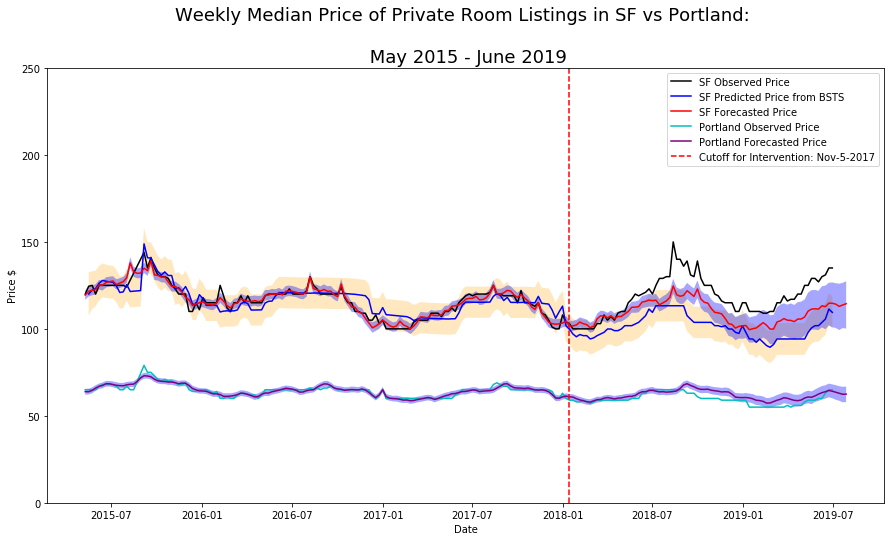

In [6]:
fig, ax = plt.subplots(1,figsize = (15,8))

xlinspace = pd.date_range('2015-05-01', periods= price.shape[0], freq='W')

sns.lineplot(x= 'date', y='SF_median_price', color='k', data = price, label = "SF Observed Price")

sns.lineplot(x= 'date', y='preds', data = ci_jan2018, color = 'b', \
             linestyle = '--', label = "SF Predicted Price from BSTS")

plt.fill_between(ci_jan2018['date'],ci_jan2018['preds_lower'], ci_jan2018['preds_upper'], 
                facecolor = 'orange',
                interpolate = 'True',
                alpha = 0.25)

sns.lineplot(x = 'ds', y = 'yhat', data = forecast_jan2018, linestyle = '--', color = 'red', \
             label = 'SF Forecasted Price')
plt.fill_between(forecast_jan2018['ds'],forecast_jan2018['yhat_lower'],
                 forecast_jan2018['yhat_upper'], 
                facecolor = 'blue',
                interpolate = 'True',
                alpha = 0.35)



sns.lineplot(x= 'date', y='Portland_median_price', data = price, color='c',label = "Portland Observed Price")
sns.lineplot(x = 'ds', y='yhat', data = forecast_jan2018_portland, linestyle = '--',
             color = 'purple', \
             label = 'Portland Forecasted Price')
plt.fill_between(forecast_jan2018_portland['ds'],forecast_jan2018_portland['yhat_lower'],
                 forecast_jan2018_portland['yhat_upper'], 
                facecolor = 'blue',
                interpolate = 'True',
                alpha = 0.35)

    
plt.axvline(x= datetime.date(2018,1,14), color = 'red', linestyle='--',label='Cutoff for Intervention: Nov-5-2017')


ax.set_ylim(0,250)
plt.xlabel("Date")
plt.ylabel("Price $")
plt.title("Weekly Median Price of Private Room Listings in SF vs Portland: \n \n May 2015 - June 2019", fontsize = 18)
plt.legend()

xfmt = mdates.DateFormatter('%m-%d-%y')
          
plt.savefig('../images/CI_Forecast_Combined_Jan2018.png')